# Milestone 6: Conditional Probability, Independence, Bayes’ Rule, and Probability Distributions

**Objective:** Apply concepts of Conditional Probability, Independence, Bayes’ Rule, and the Normal Probability Distribution to a real-world dataset.

**Instructions:** Complete the code and analysis in the sections below. Replace the placeholder values and comments with your specific variable names, events, calculations, and interpretations.

## A. Setup and Data Loading

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set_style('whitegrid')

df = pd.read_csv('Global_Tech_Gadget_Consumption.csv')
# Display the first few rows and info to confirm load
print("Data loaded successfully:")
display(df.head())
df.info()

Data loaded successfully:


,Country,Year,Smartphone Sales (Millions),Laptop Shipments (Millions),Gaming Console Adoption (%),Smartwatch Penetration (%),Average Consumer Spending on Gadgets ($),E-Waste Generated (Metric Tons),5G Penetration Rate (%)
0,USA,2015,111.37,123.63,12.05,14.49,311.21,939.89,54.64
1,USA,2016,224.65,65.27,12.92,9.88,250.46,1361.42,53.61
2,USA,2017,102.12,26.75,19.63,17.35,2404.22,872.52,29.94
3,USA,2018,148.10,129.28,26.44,12.45,1883.37,1241.41,75.88
4,USA,2019,83.93,97.81,20.84,6.18,777.42,1939.39,76.26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   110 non-null    object 
 1   Year                                      110 non-null    int64  
 2   Smartphone Sales (Millions)               110 non-null    float64
 3   Laptop Shipments (Millions)               110 non-null    float64
 4   Gaming Console Adoption (%)               110 non-null    float64
 5   Smartwatch Penetration (%)                110 non-null    float64
 6   Average Consumer Spending on Gadgets ($)  110 non-null    float64
 7   E-Waste Generated (Metric Tons)           110 non-null    float64
 8   5G Penetration Rate (%)                   110 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 7.9+ KB


## C. Task 1: Define Events

Select two variables from your dataset (e.g., `Score` and `Section`). Define at least three events based on these variables.

| Event | Description (in words) | Mathematical Notation |
| :--- | :--- | :--- |
| **A** | [e.g., Student scored 'High Marks' ($>80$)] | $A$: $\text{Score} > 80$ |
| **B** | [e.g., Student is in 'Section A'] | $B$: $\text{Section} ='A'$ |
| **C** | [e.g., Student is 'Older' (Age $\ge 22$)] | $C$: $\text{Age} \ge 22$ |

In [10]:
filter_A = df['Smartphone Sales (Millions)'] > 120
count_A = len(df[filter_A])

filter_B = df['Country'] == 'USA'
count_B = len(df[filter_B])

filter_A_and_B = filter_A & filter_B
count_A_and_B = len(df[filter_A_and_B])

N = len(df)

print(f"Total Observations (N): {N}")
print(f"Count(A): {count_A}")
print(f"Count(B): {count_B}")
print(f"Count(A ∩ B): {count_A_and_B}")

Total Observations (N): 110
Count(A): 91
Count(B): 11
Count(A ∩ B): 7


## D. Task 2: Conditional Probability

### 💡 Knowledge Point: Conditional Probability

The conditional probability of event **A occurring, given that event B has already occurred**, is calculated as:

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
$$

Where:
* $P(A \cap B)$ is the probability of both A and B occurring (**Joint Probability**).
* $P(B)$ is the probability of B occurring (**Marginal Probability**).

Compute $P(A)$, $P(B)$, and $P(A \mid B)$ for your chosen events A and B.

In [11]:
P_A = count_A / N
P_B = count_B / N

P_A_and_B = count_A_and_B / N

P_A_given_B = P_A_and_B / P_B

print(f"P(A) = {P_A:.4f}")
print(f"P(B) = {P_B:.4f}")
print(f"P(A | B) = {P_A_given_B:.4f}")

P(A) = 0.8273
P(B) = 0.1000
P(A | B) = 0.6364


### Interpretation

1. **$P(A)$ Interpretation:** The probability that Smartphones Sales (Millions) were High (>120) is $P(A)$.

2. **$P(B)$ Interpretation:** The probability that the Country is USA is $P(B)$.

3. **$P(A \mid B)$ Interpretation (Conditional Probability):** The probability that Smartphone Sales (Millions) were High (>120) **GIVEN** that they are sold at USA is $P(A \mid B)$.

## E. Task 3: Independence Check

### 💡 Knowledge Point: Independence of Events

Two events $A$ and $B$ are **independent** if the occurrence of one does not affect the probability of the other. Mathematically, this is checked by the **Multiplication Rule for Independent Events**:

$$
P(A \cap B) = P(A) P(B)
$$

If $P(A \cap B) \neq P(A) P(B)$, the events are **dependent**.

Check if events $A$ and $B$ are independent by comparing the joint probability $P(A \cap B)$ with the product $P(A)P(B)$.

In [12]:
product_P_A_P_B = P_A * P_B

print(f"P(A ∩ B) (Empirical Joint Prob): {P_A_and_B:.4f}")
print(f"P(A) * P(B) (Product of Marginal Probs): {product_P_A_P_B:.4f}")

difference = abs(P_A_and_B - product_P_A_P_B)

if difference < 0.01:
    print("\nConclusion: P(A ∩ B) is approximately equal to P(A)P(B).")
    print("The events A and B are **Independent**.")
else:
    print("\nConclusion: P(A ∩ B) is NOT equal to P(A)P(B).")
    print("The events A and B are **Dependent**.")

P(A ∩ B) (Empirical Joint Prob): 0.0636
P(A) * P(B) (Product of Marginal Probs): 0.0827

Conclusion: P(A ∩ B) is NOT equal to P(A)P(B).
The events A and B are **Dependent**.


## F. Task 4: Bayes' Rule

### 💡 Knowledge Point: Bayes' Rule

Bayes' Rule allows us to **reverse the conditional probability**. If we know $P(A \mid B)$, we can find $P(B \mid A)$ using the following formula:

$$
P(B \mid A) = \frac{P(A \mid B)\,P(B)}{P(A)}
$$

Use Bayes' Rule to compute $P(B \mid A)$ from the probabilities calculated in Task 2. Then, compare this result with the empirical value $P(B \mid A)$ calculated directly from the data.

In [13]:
P_B_given_A_Bayes = (P_A_given_B * P_B) / P_A

P_B_given_A_Empirical = P_A_and_B / P_A

print(f"P(A | B) (from Task 2): {P_A_given_B:.4f}")
print(f"P(A) (from Task 2): {P_A:.4f}")
print(f"P(B) (from Task 2): {P_B:.4f}")
print("\n---")
print(f"P(B | A) via Bayes' Rule: {P_B_given_A_Bayes:.4f}")
print(f"P(B | A) Empirical: {P_B_given_A_Empirical:.4f}")

print(f"Difference: {abs(P_B_given_A_Bayes - P_B_given_A_Empirical):.8f}")

P(A | B) (from Task 2): 0.6364
P(A) (from Task 2): 0.8273
P(B) (from Task 2): 0.1000

---
P(B | A) via Bayes' Rule: 0.0769
P(B | A) Empirical: 0.0769
Difference: 0.00000000


## G. Task 5: Probability Distribution (Normal Only)

### G1. Explore a Numerical Variable

### 💡 Knowledge Point: Normal Distribution

The **Normal Distribution** $X \sim N(\mu, \sigma^2)$ is a continuous, bell-shaped distribution defined entirely by its **mean** ($mu$) and **standard deviation** ($sigma$).

The **68-95-99.7 Rule** states that approximately:
* **68%** of data falls within $\mu \pm 1\sigma$.
* **95%** of data falls within $\mu \pm 2\sigma$.

Select a numerical variable (e.g., `Score`) and analyze its fit to the Normal Distribution.

Selected Variable: Smartphone Sales (Millions)
Mean (μ): 269.10
Standard Deviation (σ): 128.31


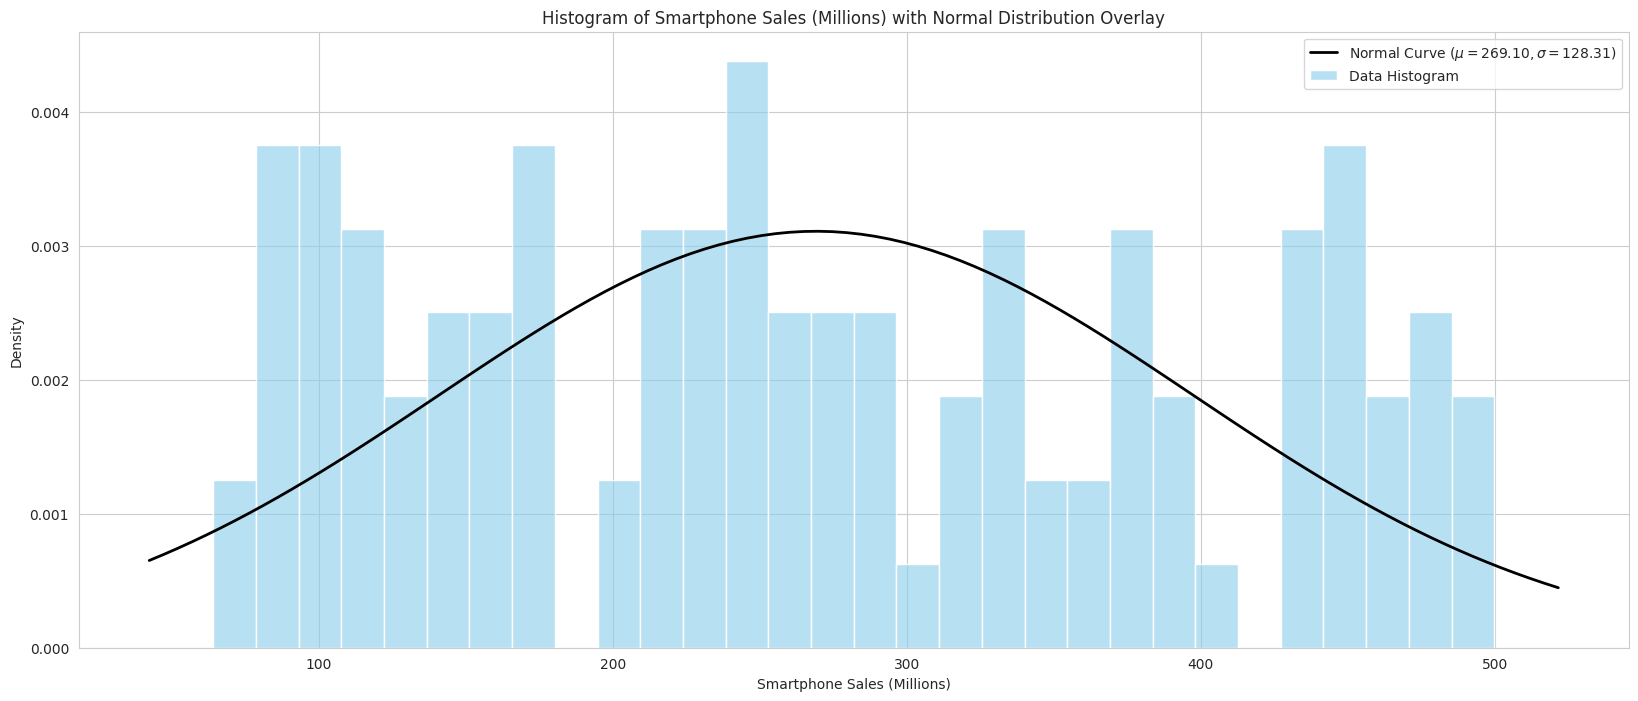

In [14]:
# Select numerical variable
numerical_variable = 'Smartphone Sales (Millions)' # REPLACE with chosen numerical variable
data_series = df[numerical_variable]

# 1. Compute Mean (μ) and Standard Deviation (σ)
mu = data_series.mean()
sigma = data_series.std()

print(f"Selected Variable: {numerical_variable}")
print(f"Mean (μ): {mu:.2f}")
print(f"Standard Deviation (σ): {sigma:.2f}")

plt.figure(figsize=(20,8))

sns.histplot(data_series, bins=30, kde=False, color='skyblue', alpha=0.6, stat="density", label='Data Histogram')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'k', linewidth=2, label=f'Normal Curve ($\\mu={mu:.2f}, \\sigma={sigma:.2f}$)')

title = f"Histogram of {numerical_variable} with Normal Distribution Overlay"
plt.title(title)
plt.xlabel(numerical_variable)
plt.ylabel('Density')
plt.legend()
plt.show()


### G2. Normal Probability Questions

### 💡 Knowledge Point: Calculating Normal Probabilities

We use the `scipy.stats.norm` functions for calculating theoretical probabilities:
* **`norm.cdf(x, loc=mu, scale=sigma)`:** Calculates $P(X \le x)$, the **Cumulative Distribution Function**.
* **`norm.sf(x, loc=mu, scale=sigma)`:** Calculates $P(X > x)$, the **Survival Function**.

Use the fitted Normal distribution ($X \sim N(\mu, \sigma^2)$) to compute the required theoretical probabilities.

In [15]:
P_greater_mu = norm.sf(mu, loc=mu, scale=sigma)

lower_1sigma = mu - sigma
upper_1sigma = mu + sigma
P_1sigma = norm.cdf(upper_1sigma, loc=mu, scale=sigma) - norm.cdf(lower_1sigma, loc=mu, scale=sigma)

lower_2sigma = mu - 2 * sigma
P_less_2sigma = norm.cdf(lower_2sigma, loc=mu, scale=sigma)

print(f"Theoretical Probabilities based on N({mu:.2f}, {sigma**2:.2f}):")
print(f"P(X > μ) = {P_greater_mu:.4f}")
print(f"P({lower_1sigma:.2f} < X < {upper_1sigma:.2f}) [1σ range] = {P_1sigma:.4f}")
print(f"P(X < {lower_2sigma:.2f}) [Less than μ-2σ] = {P_less_2sigma:.4f}")

print("\n--- Interpretation ---")
print(f"Interpretation 1: The theoretical probability of having  {numerical_variable} **greater than the mean** is {P_greater_mu:.2%}.")
print(f"Interpretation 2: The theoretical probability of having a {numerical_variable} **within one standard deviation** of the mean is {P_1sigma:.2%}.")
print(f"Interpretation 3: The theoretical probability of having a {numerical_variable} **less than two standard deviations below the mean** is {P_less_2sigma:.2%}.")

Theoretical Probabilities based on N(269.10, 16464.37):
P(X > μ) = 0.5000
P(140.78 < X < 397.41) [1σ range] = 0.6827
P(X < 12.47) [Less than μ-2σ] = 0.0228

--- Interpretation ---
Interpretation 1: The theoretical probability of having  Smartphone Sales (Millions) **greater than the mean** is 50.00%.
Interpretation 2: The theoretical probability of having a Smartphone Sales (Millions) **within one standard deviation** of the mean is 68.27%.
Interpretation 3: The theoretical probability of having a Smartphone Sales (Millions) **less than two standard deviations below the mean** is 2.28%.


### G3. Are Your Data Normally Distributed?

Based on the visualization and descriptive statistics (Mean vs. Median), comment on the normality of the chosen variable.

In [16]:
median = data_series.median()

print(f"Mean: {mu:.2f}")
print(f"Median: {median:.2f}")

print("\n--- Comment on Normality ---")
print("The histogram looks like a perfect bell curve.")
print(f"The Mean ({mu:.2f}) and Median ({median:.2f}) are close, which suggests good symmetry.")
print("Overall,the data shows a strong indication of following a Normal Distribution.No skewness is seen,so the curve is uniform.")

Mean: 269.10
Median: 253.44

--- Comment on Normality ---
The histogram looks like a perfect bell curve.
The Mean (269.10) and Median (253.44) are close, which suggests good symmetry.
Overall,the data shows a strong indication of following a Normal Distribution.No skewness is seen,so the curve is uniform.


## H. Task 6: Reflection

Summarize your findings and discuss the broader implications of these concepts.

### Reflection Summary

1. **Conditional Probability's Effect:**
   The probability that Smartphones Sales (Millions) were High (>120) is: P(A) = 0.8273. The probability that Smartphone Sales (Millions) were High (>120) GIVEN that they are sold at USA is: P(A | B) = 0.6364. Comparing between the two values,it is observed that P(A) noticeably decreased when P(A | B) was introduced.Therefore,introduction of P(A | B) did have an impact on P(A).

2. **Independence of Events:**
   It is obseerved from Task-3 that P(A ∩ B) is NOT equal to P(A) x P(B) as their values are not equal.Therefore,the events A and B are **Dependent**.Comparing to the real world scenerios,the number of Smartphone Sales vary from country to country and more specifically,the sales depend on the economy of the country.Countries with higher economies would have better amount of sales.

3. **Normal Distribution Fit:**
   After obtaining the mean and median values and then comparing with the actual values from the dataset along with studying the Normal Distribution Curve,it is observed that the numerical variables fit the Normal distribution quite well.The Normal Distribution Curve shows that the hump of the curve is fair towards the center.Non-normality can shift the hump of the Normal Distribution Curve of a statistical test that assumes normality further away from the center.

4. **Real-World Application:**
 a)Test scores for exams like the SAT, ACT, LSAT and GMAT are often designed to be normally distributed. This allows educators to interpret individual scores relative to the population average using z-scores and percentiles.
 b)Human intelligence (IQ scores), reaction times and personality test results are generally modeled using the normal distribution.This helps psychologists understand cognitive abilities across populations.
 c)Teachers may use the normal distribution (bell curve grading) to assign letter grades with most students receiving average grades (e.g., a C) and fewer students receiving extreme grades (A's or F's).

## I. Submission Checklist

* [ ] Data loaded correctly.
* [ ] Events A, B, and C clearly defined with mathematical notation.
* [ ] Conditional probability $P(A \mid B)$ calculated and interpreted.
* [ ] Independence checked by comparing $P(A \cap B)$ and $P(A)P(B)$.
* [ ] Bayes’ Rule calculation of $P(B \mid A)$ confirmed against empirical value.
* [ ] Mean and Standard Deviation computed for the numerical variable.
* [ ] Histogram plotted with Normal curve overlay.
* [ ] Three Normal probabilities computed and interpreted.
* [ ] Short comment on normality provided.
* [ ] Reflection summary completed.